<a href="https://colab.research.google.com/github/MRI-2021/Computer-science-fundamentals/blob/main/Widening%20Participation%20undergraduate%20UCAS%202010%202021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Unifrog data_file.csv to Unifrog data_file.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Unifrog data_file.csv']))
# Activity dataset is now stored in a Pandas Dataframe

In [4]:
print('\n============= HEAD =============')
print(df.head(3))
print('\n============= DESCRIBE =============')
print(df.describe())


============= HEAD =============
                     inst_all INSTITUTION_CODE  Cycle  \
0  A20 University of Aberdeen              A20   2010   
1  A20 University of Aberdeen              A20   2010   
2  A20 University of Aberdeen              A20   2010   

                  statistic  equality_dimension      agegroup   value  
0  June deadline applicants               Total  18 year olds  7325.0  
1  June deadline applicants  White ethnic group  18 year olds  6800.0  
2  June deadline applicants  Black ethnic group  18 year olds    70.0  

============= DESCRIBE =============
               Cycle          value
count  386856.000000  379723.000000
mean     2015.500000    1311.430507
std         3.452057    3253.198768
min      2010.000000     -22.700000
25%      2012.750000       0.902000
50%      2015.500000     110.800000
75%      2018.250000    1030.000000
max      2021.000000   56355.000000


In [5]:
print('\n============= INFO =============')
df.info()


============= INFO =============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386856 entries, 0 to 386855
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inst_all            386856 non-null  object 
 1   INSTITUTION_CODE    386856 non-null  object 
 2   Cycle               386856 non-null  int64  
 3   statistic           386856 non-null  object 
 4   equality_dimension  386856 non-null  object 
 5   agegroup            386856 non-null  object 
 6   value               379723 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.7+ MB


In [136]:
import plotly.express as px

fig = px.pie(df, values='value', names='equality_dimension')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=22, uniformtext_mode='hide', title_text='Value VS equality dimension', title_x=0.45)

fig.show()

In [ ]:
# Let's create a counter to compare my values.
# df['signup_count'] = '1'

# Let's check that it has been created.
# print(df.nunique())

# Let's converte age group in boolean (18 year olds and All ages, become True and False).
# df['BoolAgeGroup'] = df['agegroup'] == '18 year olds'

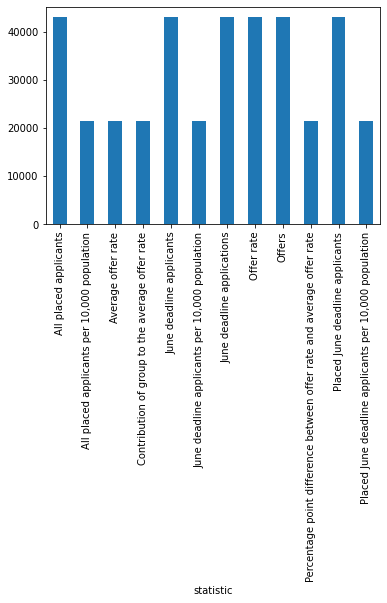

In [28]:
# Plot the Size of each Group in a Groupby object (of a single column).
df.groupby(['statistic']).size().plot(kind = "bar")

<Figure size 720x360 with 0 Axes>

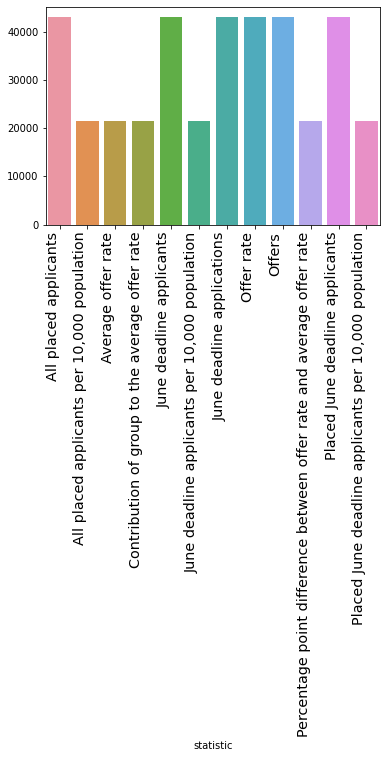

<Figure size 720x360 with 0 Axes>

In [148]:
result = df.groupby(['statistic']).size()

chart = sns.barplot(x = result.index, y = result.values)

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.figure(figsize=(10,5))

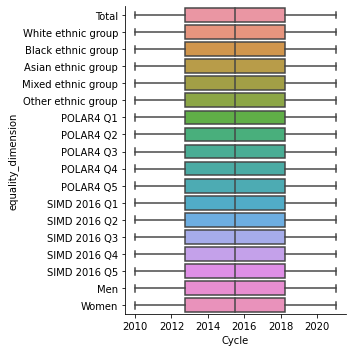

In [39]:
## Seaborn
sns.catplot(x = 'Cycle', y = 'equality_dimension', kind = 'box', data = df)
# plt.xticks(rotation = 90)
# plt.show()

##Plotly Express
# px.box(df, x = "Cycle", y = 'equality_dimension', hover_name = 'agegroup')

[Text(0.5, 1.0, 'POLAR4 Q1')]

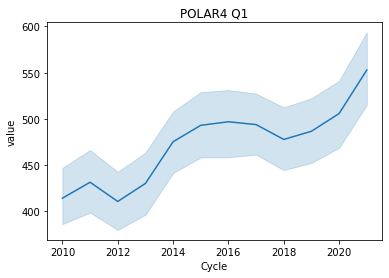

In [135]:
# This graph takes into account ALL universities and ALL ages (not only 18).
POLAR4_Q1 = df.query("equality_dimension == 'POLAR4 Q1'")
sns.lineplot(data=POLAR4_Q1, x="Cycle", y="value").set(title='POLAR4 Q1')

In [155]:
# df_wide = df.pivot("Cycle", "equality_dimension", "value")
# df_wide.head()

df_wide = df.pivot_table(index='Cycle', 
                        columns='equality_dimension', 
                        values='value')
df_wide.columns.name = None

df_wide

Asian ethnic group  Black ethnic group          Men  \
Cycle                                                        
2010           426.454525          255.675497  1847.889280   
2011           445.816855          275.496640  1884.254073   
2012           435.280978          273.867977  1754.460165   
2013           460.747461          288.252023  1821.523859   
2014           488.569578          303.399853  1887.842742   
2015           520.425118          319.031036  1924.199300   
2016           542.897915          327.379604  1932.653898   
2017           557.662496          316.851621  1910.812668   
2018           574.865648          317.100215  1843.329974   
2019           616.814269          336.665467  1832.007347   
2020           659.645886          360.032739  1841.784279   
2021           713.782684          389.686248  1999.302805   

       Mixed ethnic group  Other ethnic group   POLAR4 Q1   POLAR4 Q2  \
Cycle                                                                   
2010           147.343463           51.091461  414.413399  601.936415   
2011           160.347773           54.006011  431.612257  616.107833   
2012           152.356744           62.472965  410.844291  584.627208   
2013           163.796747           65.005831  430.300355  606.890625   
2014           176.719539           73.043579  475.401721  651.957827   
2015           193.309719           78.569103  493.175037  672.546851   
2016           201.497926           82.364911  497.005059  679.283887   
2017           208.016854           88.991783  493.954747  663.175694   
2018           209.163128           91.043347  477.877698  643.682163   
2019           219.875809          102.473746  486.742593  637.337519   
2020           233.626273          110.479794  505.887426  656.294290   
2021           263.506341          120.797060  552.934828  720.591936   

        POLAR4 Q3    POLAR4 Q4    POLAR4 Q5  SIMD 2016 Q1  SIMD 2016 Q2  \
Cycle                                                                     
2010   773.285792   971.902592  1373.540148    273.831774    359.073416   
2011   782.939717   987.172372  1394.320577    274.699855    358.885788   
2012   744.963552   930.558868  1314.414368    288.570725    365.626411   
2013   774.178062   963.314727  1350.375441    298.476296    384.254959   
2014   808.298104   990.778477  1367.858792    336.735674    408.651263   
2015   838.251819  1021.532872  1409.019890    353.001278    430.683637   
2016   838.568620  1023.908226  1428.079430    365.133404    445.977007   
2017   828.447773  1008.454010  1412.130036    397.088026    451.758541   
2018   793.673190   984.986723  1378.036223    397.533637    450.293011   
2019   799.063897   979.858647  1368.928204    407.836333    424.443504   
2020   805.573104   992.373513  1391.698513    410.041319    430.392437   
2021   883.074249  1076.666304  1513.699052    465.601222    498.494074   

       SIMD 2016 Q3  SIMD 2016 Q4  SIMD 2016 Q5        Total  \
Cycle                                                          
2010     485.899378    608.580070    810.327952  4917.639571   
2011     467.920311    610.642252    834.226430  5013.808276   
2012     496.939481    625.961433    855.547837  4748.790927   
2013     500.560874    628.498315    850.921411  4912.827983   
2014     514.676552    645.075774    861.984219  5119.685607   
2015     547.619930    679.310030    892.018900  5286.635872   
2016     538.619663    687.703559    902.580659  5324.582227   
2017     538.125452    681.212748    879.827107  5250.564023   
2018     533.911281    672.715152    871.533478  5097.158766   
2019     508.385604    649.430689    843.848419  5088.623131   
2020     515.707659    637.730144    838.821781  5181.617645   
2021     579.042996    709.518411    912.114919  5652.668563   

       White ethnic group        Women  
Cycle                                   
2010          3251.268168  2271.892220  
2011          3273.169139  2311.619342  
201

[Text(0.5, 1.0, 'POLAR4 Q1')]

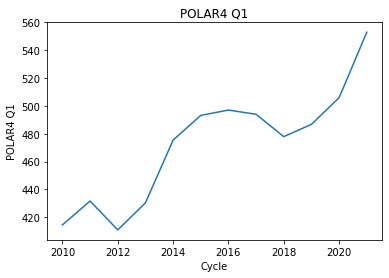

In [157]:
sns.lineplot(data=df_wide["POLAR4 Q1"]).set(title='POLAR4 Q1')

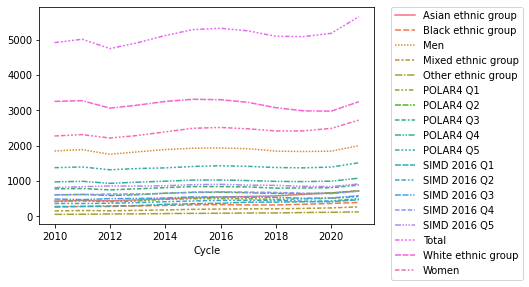

In [165]:
sns.lineplot(data=df_wide)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

[Text(0.5, 1.0, 'mean and 95% confidence interval')]

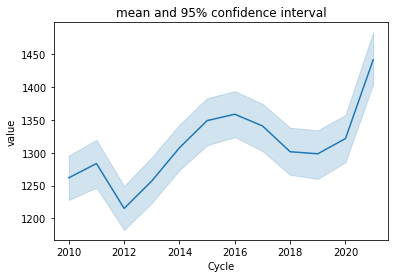

In [160]:
# mean and 95% confidence interval
sns.lineplot(data=df, x="Cycle", y="value").set(title='mean and 95% confidence interval')

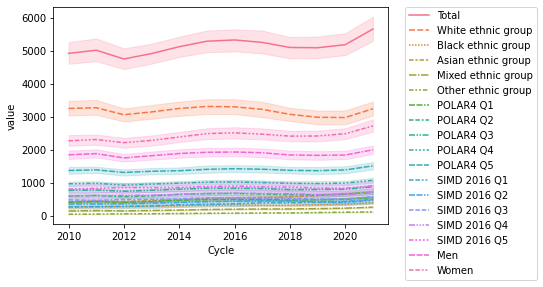

In [166]:
sns.lineplot(data=df, x="Cycle", y="value", hue="equality_dimension", style="equality_dimension")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

[Text(0.5, 1.0, 'POLAR4 Q4')]

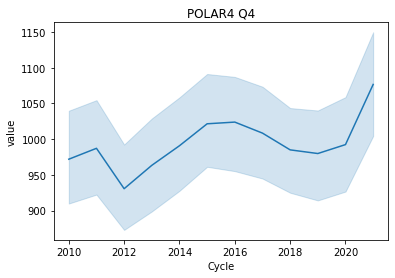

In [134]:
# This graph takes into account ALL universities and ALL ages (not only 18).
POLAR4_Q4 = df.query("equality_dimension == 'POLAR4 Q4'")
sns.lineplot(data=POLAR4_Q4, x="Cycle", y="value").set(title='POLAR4 Q4')

[Text(0.5, 1.0, 'SIMD 2016 Q1')]

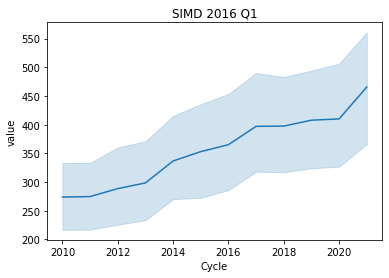

In [133]:
SIMD2016_Q1 = df.query("equality_dimension == 'SIMD 2016 Q1'")
sns.lineplot(data=SIMD2016_Q1, x="Cycle", y="value").set(title='SIMD 2016 Q1')

[Text(0.5, 1.0, 'SIMD 2016 Q4')]

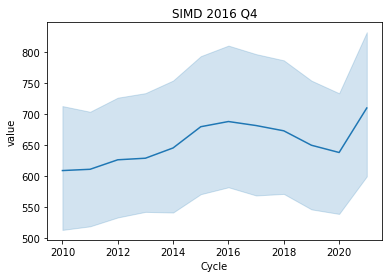

In [132]:
SIMD2016_Q4 = df.query("equality_dimension == 'SIMD 2016 Q4'")
sns.lineplot(data=SIMD2016_Q4, x="Cycle", y="value").set(title='SIMD 2016 Q4')

[Text(0.5, 1.0, 'Women')]

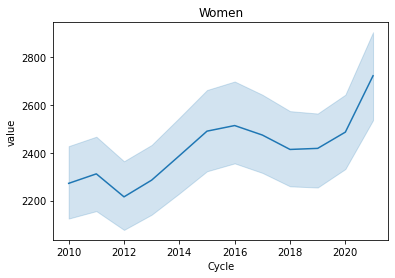

In [131]:
Women = df.query("equality_dimension == 'Women'")
sns.lineplot(data=Women, x="Cycle", y="value").set(title='Women')

[Text(0.5, 1.0, 'Men')]

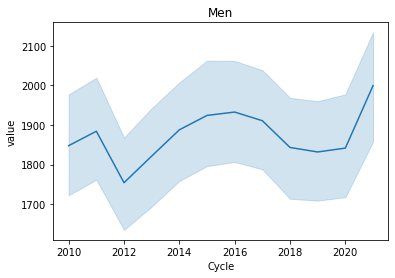

In [130]:
Men = df.query("equality_dimension == 'Men'")
sns.lineplot(data=Men, x="Cycle", y="value").set(title='Men')

[Text(0.5, 1.0, 'Total')]

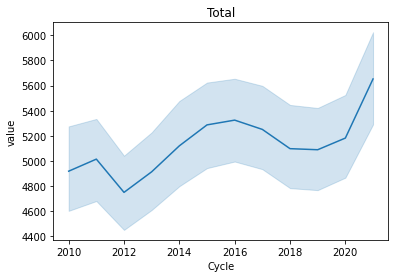

In [129]:
Total = df.query("equality_dimension == 'Total'")
sns.lineplot(data=Total, x="Cycle", y="value").set(title='Total')

[Text(0.5, 1.0, 'White ethnic group')]

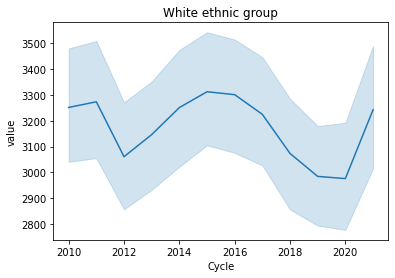

In [128]:
White = df.query("equality_dimension == 'White ethnic group'")
sns.lineplot(data=White, x="Cycle", y="value").set(title='White ethnic group')

[Text(0.5, 1.0, 'Black ethnic group')]

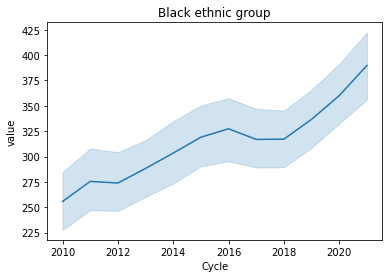

In [127]:
Black = df.query("equality_dimension == 'Black ethnic group'")
sns.lineplot(data=Black, x="Cycle", y="value").set(title='Black ethnic group')

[Text(0.5, 1.0, 'Asian ethnic group')]

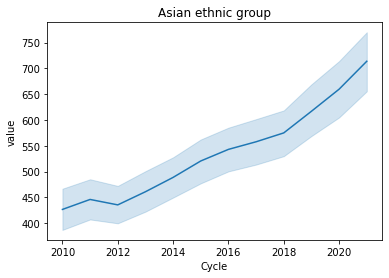

In [126]:
Asian = df.query("equality_dimension == 'Asian ethnic group'")
sns.lineplot(data=Asian, x="Cycle", y="value").set(title='Asian ethnic group')

[Text(0.5, 1.0, 'Mixed ethnic group')]

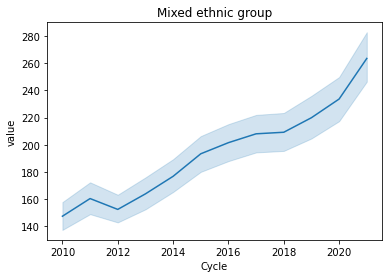

In [125]:
Mixed = df.query("equality_dimension == 'Mixed ethnic group'")
sns.lineplot(data=Mixed, x="Cycle", y="value").set(title='Mixed ethnic group')

[Text(0.5, 1.0, 'Other ethnic group')]

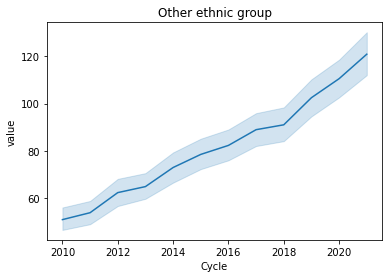

In [124]:
Other = df.query("equality_dimension == 'Other ethnic group'")
sns.lineplot(data=Other, x="Cycle", y="value").set(title='Other ethnic group')

In [ ]:
df.sort_values(by=['value'], ascending=True)

<Figure size 720x360 with 0 Axes>

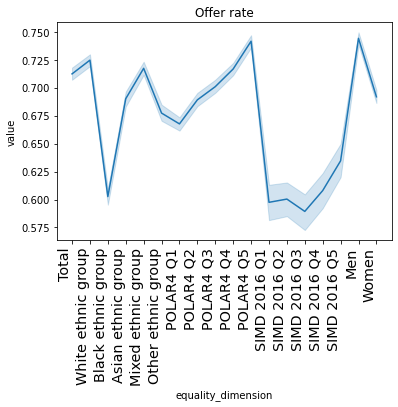

<Figure size 720x360 with 0 Axes>

In [123]:
Offer_rate = df.query("statistic == 'Offer rate'")
chart = sns.lineplot(data=Offer_rate, x="equality_dimension", y="value").set(title='Offer rate')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

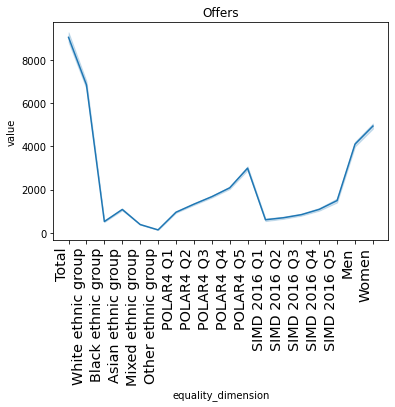

<Figure size 720x360 with 0 Axes>

In [121]:
Offers = df.query("statistic == 'Offers'")
chart = sns.lineplot(data=Offers, x="equality_dimension", y="value").set(title='Offers')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

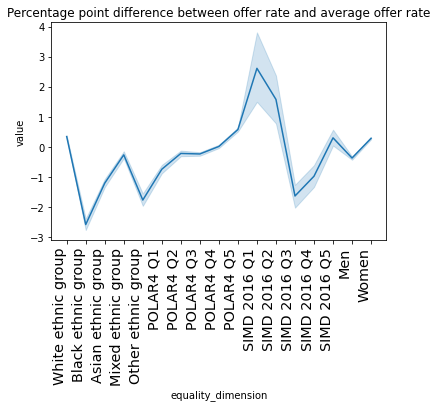

<Figure size 720x360 with 0 Axes>

In [137]:
Percentage_difference = df.query("statistic == 'Percentage point difference between offer rate and average offer rate'")
chart = sns.lineplot(data=Percentage_difference, x="equality_dimension", y="value").set(title='Percentage point difference between offer rate and average offer rate')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

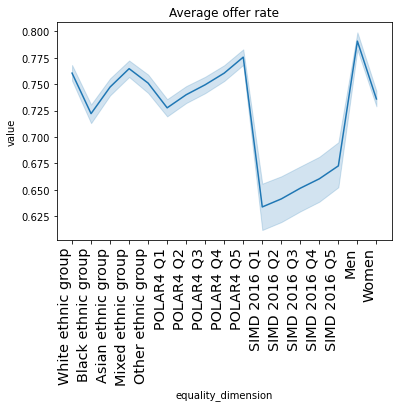

<Figure size 720x360 with 0 Axes>

In [138]:
Average_rate = df.query("statistic == 'Average offer rate'")
chart = sns.lineplot(data=Average_rate, x="equality_dimension", y="value").set(title='Average offer rate')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

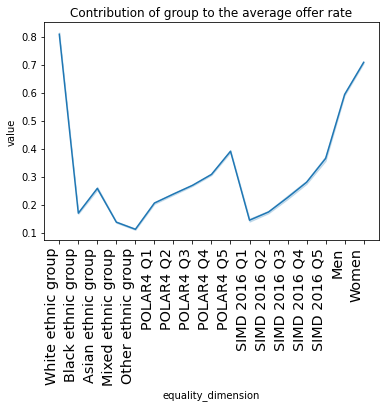

<Figure size 720x360 with 0 Axes>

In [139]:
Contribution_rate = df.query("statistic == 'Contribution of group to the average offer rate'")
chart = sns.lineplot(data=Contribution_rate, x="equality_dimension", y="value").set(title='Contribution of group to the average offer rate')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

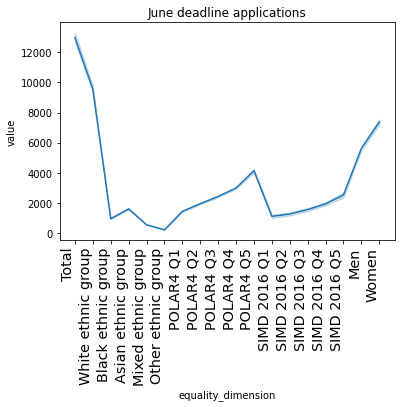

<Figure size 720x360 with 0 Axes>

In [141]:
applications = df.query("statistic == 'June deadline applications'")
chart = sns.lineplot(data=applications, x="equality_dimension", y="value").set(title='June deadline applications')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.figure(figsize=(10,5))

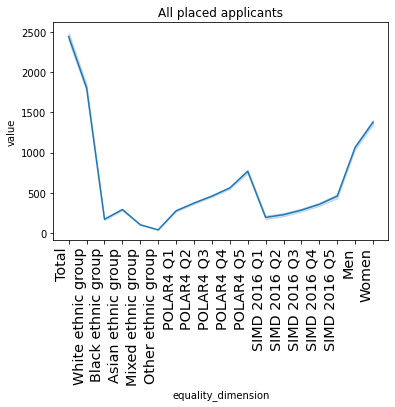

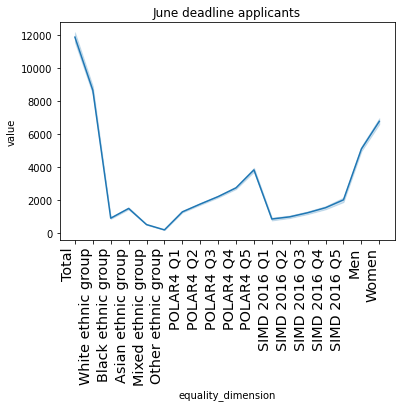

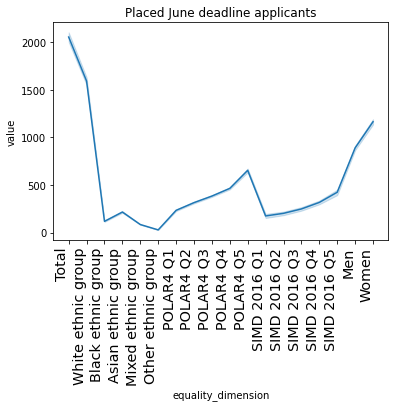

In [146]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
All_placed = df.query("statistic == 'All placed applicants'")
chart = sns.lineplot(data=All_placed, x="equality_dimension", y="value").set(title='All placed applicants')
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-large')

plt.figure(1)
June_deadline = df.query("statistic == 'June deadline applicants'")
chart = sns.lineplot(data=June_deadline, x="equality_dimension", y="value").set(title='June deadline applicants')
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-large')

plt.figure(2)
Placed_June = df.query("statistic == 'Placed June deadline applicants'")
chart = sns.lineplot(data=Placed_June, x="equality_dimension", y="value").set(title='Placed June deadline applicants')
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-large')

plt.show()

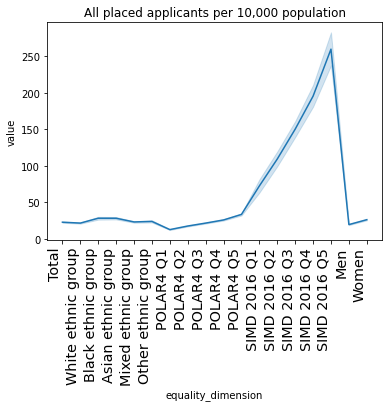

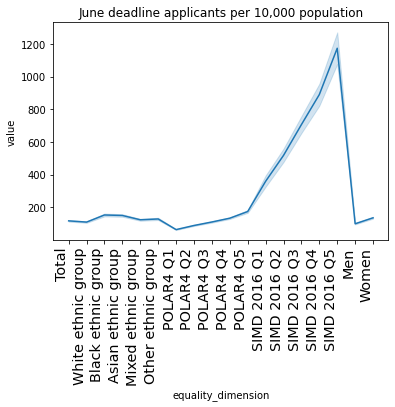

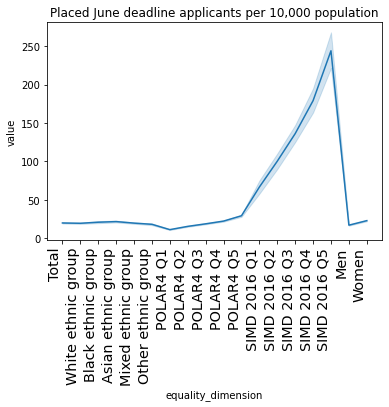

In [147]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
All_placed10K = df.query("statistic == 'All placed applicants per 10,000 population'")
chart = sns.lineplot(data=All_placed10K, x="equality_dimension", y="value").set(title='All placed applicants per 10,000 population')
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-large')

plt.figure(1)
June_deadline10K = df.query("statistic == 'June deadline applicants per 10,000 population'")
chart = sns.lineplot(data=June_deadline10K, x="equality_dimension", y="value").set(title='June deadline applicants per 10,000 population')
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-large')

plt.figure(2)
Placed_June10K = df.query("statistic == 'Placed June deadline applicants per 10,000 population'")
chart = sns.lineplot(data=Placed_June10K, x="equality_dimension", y="value").set(title='Placed June deadline applicants per 10,000 population')
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-large')

plt.show()

In [173]:
## Dataframe sorting when using .loc for University of Birmingham
df_UoB = df.loc[(df.inst_all == 'B32 University of Birmingham'),].sort_values(by=['inst_all'], ascending=False)
df_UoB

inst_all INSTITUTION_CODE  Cycle  \
22032   B32 University of Birmingham              B32   2010   
268923  B32 University of Birmingham              B32   2010   
23899   B32 University of Birmingham              B32   2021   
23900   B32 University of Birmingham              B32   2021   
23901   B32 University of Birmingham              B32   2021   
...                              ...              ...    ...   
22969   B32 University of Birmingham              B32   2010   
22970   B32 University of Birmingham              B32   2010   
22971   B32 University of Birmingham              B32   2010   
22972   B32 University of Birmingham              B32   2010   
269855  B32 University of Birmingham              B32   2021   

                                              statistic  equality_dimension  \
22032                          June deadline applicants               Total   
268923                         June deadline applicants  Asian ethnic group   
23899   Contribution of group to the average offer rate           POLAR4 Q3   
23900   Contribution of group to the average offer rate           POLAR4 Q4   
23901   Contribution of group to the average offer rate           POLAR4 Q5   
...                                                 ...                 ...   
22969                        June deadline applications  White ethnic group   
22970                        June deadline applications  Black ethnic group   
22971                        June deadline applications  Asian ethnic group   
22972                        June deadline applications  Mixed ethnic group   
269855                                       Offer rate               Women   

            agegroup      value  BoolAgeGroup signup_count  
22032   18 year olds  22800.000          True            1  
268923      All ages   5475.000         False            1  
23899   18 year olds      0.238          True            1  
23900   18 year olds      0.234          True            1  
23901   18 year olds      0.421          True            1  
...              ...        ...           ...          ...  
22969   18 year olds  18220.000          True            1  
22970   18 year olds    905.000          True            1  
22971   18 year olds   3540.000          True            1  
22972   18 year olds    795.000          True            1  
269855      All ages      0.626         False            1  

[2808 rows x 9 columns]

In [182]:
# Data only of University of Birmingham
df_gb = df_UoB.groupby(['statistic'])
df_agg = df_gb.agg({'statistic': 'size'})
df_agg

statistic
statistic                                                    
All placed applicants                                     312
All placed applicants per 10,000 population               156
Average offer rate                                        156
Contribution of group to the average offer rate           156
June deadline applicants                                  312
June deadline applicants per 10,000 population            156
June deadline applications                                312
Offer rate                                                312
Offers                                                    312
Percentage point difference between offer rate ...        156
Placed June deadline applicants                           312
Placed June deadline applicants per 10,000 popu...        156

In [179]:
df_UoB_Y13 = df_UoB.loc[(df_UoB.agegroup == '18 year olds'),].sort_values(by=['agegroup'], ascending=False)
df_UoB_Y13

inst_all INSTITUTION_CODE  Cycle  \
22032  B32 University of Birmingham              B32   2010   
23223  B32 University of Birmingham              B32   2017   
23235  B32 University of Birmingham              B32   2018   
23234  B32 University of Birmingham              B32   2018   
23233  B32 University of Birmingham              B32   2018   
...                             ...              ...    ...   
22466  B32 University of Birmingham              B32   2019   
22465  B32 University of Birmingham              B32   2019   
22464  B32 University of Birmingham              B32   2019   
22463  B32 University of Birmingham              B32   2019   
22972  B32 University of Birmingham              B32   2010   

                        statistic  equality_dimension      agegroup    value  \
22032    June deadline applicants               Total  18 year olds  22800.0   
23223                      Offers           POLAR4 Q3  18 year olds   4550.0   
23235                      Offers           POLAR4 Q2  18 year olds   2740.0   
23234                      Offers           POLAR4 Q1  18 year olds   1610.0   
23233                      Offers  Other ethnic group  18 year olds    335.0   
...                           ...                 ...           ...      ...   
22466       All placed applicants  Other ethnic group  18 year olds     55.0   
22465       All placed applicants  Mixed ethnic group  18 year olds    250.0   
22464       All placed applicants  Asian ethnic group  18 year olds    795.0   
22463       All placed applicants  Black ethnic group  18 year olds    260.0   
22972  June deadline applications  Mixed ethnic group  18 year olds    795.0   

       BoolAgeGroup signup_count  
22032          True            1  
23223          True            1  
23235          True            1  
23234          True            1  
23233          True            1  
...             ...          ...  
22466          True            1  
22465          True            1  
22464          True            1  
22463          True            1  
22972          True            1  

[1872 rows x 9 columns]

In [184]:
# Data only of University of Birmingham AND only 18 year olds
df_gb = df_UoB_Y13.groupby(['statistic'])
df_agg = df_gb.agg({'statistic': 'size'})
df_agg

statistic
statistic                                                    
All placed applicants                                     156
All placed applicants per 10,000 population               156
Average offer rate                                        156
Contribution of group to the average offer rate           156
June deadline applicants                                  156
June deadline applicants per 10,000 population            156
June deadline applications                                156
Offer rate                                                156
Offers                                                    156
Percentage point difference between offer rate ...        156
Placed June deadline applicants                           156
Placed June deadline applicants per 10,000 popu...        156

In [6]:
## Using the pandas dataframe nunique() function with default parameters gives a count of all the distinct values in each column.
print(df.nunique())

inst_all                132
INSTITUTION_CODE        132
Cycle                    12
statistic                12
equality_dimension       18
agegroup                  2
value                 11306
dtype: int64


In [7]:
df_gb = df.groupby(['agegroup'])
df_agg = df_gb.agg({'agegroup': 'size'})
df_agg

agegroup
agegroup              
18 year olds    257904
All ages        128952

In [8]:
df_gb = df.groupby(['equality_dimension'])
df_agg = df_gb.agg({'equality_dimension': 'size'})
df_agg

equality_dimension
equality_dimension                    
Asian ethnic group               28512
Black ethnic group               28512
Men                              28512
Mixed ethnic group               28512
Other ethnic group               28512
POLAR4 Q1                        28512
POLAR4 Q2                        28512
POLAR4 Q3                        28512
POLAR4 Q4                        28512
POLAR4 Q5                        28512
SIMD 2016 Q1                      3240
SIMD 2016 Q2                      3240
SIMD 2016 Q3                      3240
SIMD 2016 Q4                      3240
SIMD 2016 Q5                      3240
Total                            28512
White ethnic group               28512
Women                            28512

In [9]:
df_gb = df.groupby(['statistic'])
df_agg = df_gb.agg({'statistic': 'size'})
df_agg

statistic
statistic                                                    
All placed applicants                                   42984
All placed applicants per 10,000 population             21492
Average offer rate                                      21492
Contribution of group to the average offer rate         21492
June deadline applicants                                42984
June deadline applicants per 10,000 population          21492
June deadline applications                              42984
Offer rate                                              42984
Offers                                                  42984
Percentage point difference between offer rate ...      21492
Placed June deadline applicants                         42984
Placed June deadline applicants per 10,000 popu...      21492

In [10]:
df_gb = df.groupby(['Cycle'])
df_agg = df_gb.agg({'Cycle': 'size'})
df_agg

Cycle
Cycle       
2010   32238
2011   32238
2012   32238
2013   32238
2014   32238
2015   32238
2016   32238
2017   32238
2018   32238
2019   32238
2020   32238
2021   32238

In [170]:
df_gb = df.groupby(['inst_all'])
df_agg = df_gb.agg({'inst_all': 'size'})
df_agg.head(15)

inst_all
inst_all                                   
A20 University of Aberdeen             3888
A30 Abertay University                 3888
A40 Aberystwyth University             2808
A60 Anglia Ruskin University           2808
A66 Arts University Bournemouth        2808
A80 Aston University Birmingham        2808
B06 Bangor University                  2808
B16 University of Bath                 2808
B20 Bath Spa University                2808
B22 University of Bedfordshire         2808
B25 Birmingham City University         2808
B32 University of Birmingham           2808
B35 University College Birmingham      2808
B38 Bishop Grosseteste University      2808
B44 University of Bolton               2808